In [21]:
import nltk
import time
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

%matplotlib inline
sns.set_style("whitegrid")
nltk.download('vader_lexicon')
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/abhijit/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
def facebook_sentiment(topic, count=100, disp_head=False):

  tweets  = pd.read_csv('/Users/abhijit/Desktop/fbcomments.csv')
  data = pd.DataFrame(data=[tweet for tweet in tweets], columns=['comments'])

  sid = SentimentIntensityAnalyzer()

  listy = []

  for index, row in data.iterrows():
      ss = sid.polarity_scores(row["comments"])
      listy.append(ss)

  se = pd.Series(listy)

  data['polarity'] = se.values

  data['negative'] = pd.Series([x['neg'] for x in data.polarity])
  data['neutral'] = pd.Series([x['neu'] for x in data.polarity])
  data['positive'] = pd.Series([x['pos'] for x in data.polarity])
  data['compound'] = pd.Series([x['compound'] for x in data.polarity])

  data_partial = data[['negative','neutral','positive','compound']]
  data['sentiment'] = data_partial.idxmax(axis=1)
  
  if disp_head:
    display(data.head(6))
    
  plt.figure(figsize=(8,6))
  sns.countplot(data.sentiment, orient="h", palette='coolwarm', saturation=0.75)
  plt.title('Sentiment of ' + str(count) + ' comments about ' + topic)

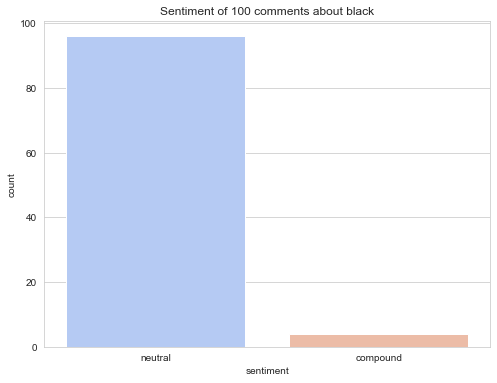

In [25]:
facebook_sentiment('black',100)

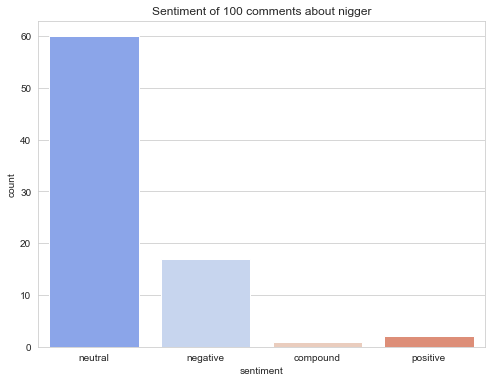

In [26]:
facebook_sentiment('nigger',100)